<a href="https://colab.research.google.com/github/RATHISHKUMAR07/ML_Projects/blob/main/SEM_VII_Playstore_reviews_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [117]:
import numpy as np 
import pandas as pd 

from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from sklearn.utils import resample
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix,classification_report
import re


In [118]:
data = pd.read_csv('./googleplaystore_user_reviews.csv')
data = data[['text','sentiment']]

In [10]:
data.head()

,text,sentiment
0,I like eat delicious food. That's I'm cooking ...,Positive
1,This help eating healthy exercise regular basis,Positive
2,NaN,NaN
3,Works great especially going grocery store,Positive
4,Best idea us,Positive


In [11]:
data = data.astype(str)

In [25]:
data = data[data.sentiment != "NaN"]
data = data[data.sentiment != "nan"]
data = data[data.sentiment != "Neutral"]

#['Positive' 'nan' 'Neutral' 'Negative']
data['text'] = data['text'].apply(lambda x: x.lower())

data['text'] = data['text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

data.head()

,text,sentiment
0,i like eat delicious food thats im cooking foo...,Positive
1,this help eating healthy exercise regular basis,Positive
3,works great especially going grocery store,Positive
4,best idea us,Positive
5,best way,Positive


In [26]:
len(data)

4784

In [27]:
print(data[ data['sentiment'] == 'Positive'].size)
print(data[ data['sentiment'] == 'Negative'].size)

for idx,row in data.iterrows():
    row[0] = row[0].replace('rt','')
data.head()

6974
2594


,text,sentiment
0,i like eat delicious food thats im cooking foo...,Positive
1,this help eating healthy exercise regular basis,Positive
3,works great especially going grocery store,Positive
4,best idea us,Positive
5,best way,Positive


In [28]:
    
max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(data['text'].values)
X = tokenizer.texts_to_sequences(data['text'].values)
X = pad_sequences(X)
X[:2]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    1,
          10,  632,  469,  159,   18, 

In [29]:
embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 161, 128)          256000    
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 161, 128)         0         
 lDropout1D)                                                     
                                                                 
 lstm_1 (LSTM)               (None, 196)               254800    
                                                                 
 dense_1 (Dense)             (None, 2)                 394       
                                                                 
Total params: 511,194
Trainable params: 511,194
Non-trainable params: 0
_________________________________________________________________
None


In [31]:
print(data['sentiment'].unique())

['Positive' 'Negative']


In [32]:
batch_size = 128
model.fit(X_train, Y_train, epochs = 15, batch_size=batch_size, verbose = 1)

Epoch 1/15
30/30 [==============================] - 62s 2s/step - loss: 0.5686 - accuracy: 0.7204
Epoch 2/15
30/30 [==============================] - 56s 2s/step - loss: 0.3850 - accuracy: 0.8187
Epoch 3/15
30/30 [==============================] - 56s 2s/step - loss: 0.1976 - accuracy: 0.9216
Epoch 4/15
30/30 [==============================] - 56s 2s/step - loss: 0.2372 - accuracy: 0.9263
Epoch 5/15
30/30 [==============================] - 57s 2s/step - loss: 0.0986 - accuracy: 0.9668
Epoch 6/15
30/30 [==============================] - 56s 2s/step - loss: 0.0754 - accuracy: 0.9765
Epoch 7/15
30/30 [==============================] - 57s 2s/step - loss: 0.0547 - accuracy: 0.9820
Epoch 8/15
30/30 [==============================] - 57s 2s/step - loss: 0.0379 - accuracy: 0.9903
Epoch 9/15
30/30 [==============================] - 58s 2s/step - loss: 0.0341 - accuracy: 0.9916
Epoch 10/15
30/30 [==============================] - 57s 2s/step - loss: 0.0595 - accuracy: 0.9801
Epoch 11/15
30/30 [

In [44]:
Y_pred = (model.predict(X_test) > 0.5).astype("int32")

30/30 [==============================] - 3s 114ms/step


In [214]:
from keras.models import Sequential
score_test = model.evaluate(X_test, Y_test, verbose=2)
score_train = model.evaluate(X_train, Y_train, verbose=2)

print('Test accuracy: ', score_test)
print('Train accuracy: ', score_train)

30/30 - 1s - loss: 0.8327 - accuracy: 0.8452 - 515ms/epoch - 17ms/step
65/65 - 1s - loss: 0.0044 - accuracy: 0.9995 - 1s/epoch - 18ms/step
Test accuracy:  [0.8327061533927917, 0.8451882600784302]
Train accuracy:  [0.004358793143182993, 0.9995182752609253]


In [45]:
data_majority = data[data['sentiment'] == 'Negative']
data_minority = data[data['sentiment'] == 'Positive']

bias = data_minority.shape[0]/data_majority.shape[0]

train = pd.concat([data_majority.sample(frac=0.8,random_state=200),
         data_minority.sample(frac=0.8,random_state=200)])
test = pd.concat([data_majority.drop(data_majority.sample(frac=0.8,random_state=200).index),
        data_minority.drop(data_minority.sample(frac=0.8,random_state=200).index)])

train = shuffle(train)
test = shuffle(test)

In [46]:
print('positive data in training:',(train.sentiment == 'Positive').sum())
print('negative data in training:',(train.sentiment == 'Negative').sum())
print('positive data in test:',(test.sentiment == 'Positive').sum())
print('negative data in test:',(test.sentiment == 'Negative').sum())


positive data in training: 2790
negative data in training: 1038
positive data in test: 697
negative data in test: 259


In [47]:

data_majority = train[train['sentiment'] == 'Negative']
data_minority = train[train['sentiment'] == 'Positive']

print("majority class before upsample:",data_majority.shape)
print("minority class before upsample:",data_minority.shape)

data_minority_upsampled = resample(data_minority, 
                                 replace=True,     
                                 n_samples= data_majority.shape[0],    
                                 random_state=123) 
 

data_upsampled = pd.concat([data_majority, data_minority_upsampled])
 
print("After upsampling\n",data_upsampled.sentiment.value_counts(),sep = "")

max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(data['text'].values) 

X_train = tokenizer.texts_to_sequences(data_upsampled['text'].values)
X_train = pad_sequences(X_train,maxlen=29)
Y_train = pd.get_dummies(data_upsampled['sentiment']).values
print('x_train shape:',X_train.shape)

X_test = tokenizer.texts_to_sequences(test['text'].values)
X_test = pad_sequences(X_test,maxlen=29)
Y_test = pd.get_dummies(test['sentiment']).values
print("x_test shape", X_test.shape)

majority class before upsample: (1038, 2)
minority class before upsample: (2790, 2)
After upsampling
Negative    1038
Positive    1038
Name: sentiment, dtype: int64
x_train shape: (2076, 29)
x_test shape (956, 29)


In [48]:
embed_dim = 128
lstm_out = 192

model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X_train.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.4, recurrent_dropout=0.4))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 29, 128)           256000    
                                                                 
 spatial_dropout1d_2 (Spatia  (None, 29, 128)          0         
 lDropout1D)                                                     
                                                                 
 lstm_2 (LSTM)               (None, 192)               246528    
                                                                 
 dense_2 (Dense)             (None, 2)                 386       
                                                                 
Total params: 502,914
Trainable params: 502,914
Non-trainable params: 0
_________________________________________________________________
None


In [49]:
batch_size = 128
class_weights = {0: 1 ,
                1: 1.6/bias }
model.fit(X_train, Y_train, epochs = 15, batch_size=batch_size, verbose = 1,
          class_weight=class_weights)

Epoch 1/15
17/17 [==============================] - 10s 408ms/step - loss: 0.5216 - accuracy: 0.5173
Epoch 2/15
17/17 [==============================] - 6s 363ms/step - loss: 0.4585 - accuracy: 0.5954
Epoch 3/15
17/17 [==============================] - 6s 372ms/step - loss: 0.3109 - accuracy: 0.8131
Epoch 4/15
17/17 [==============================] - 5s 293ms/step - loss: 0.1971 - accuracy: 0.8964
Epoch 5/15
17/17 [==============================] - 5s 296ms/step - loss: 0.1269 - accuracy: 0.9326
Epoch 6/15
17/17 [==============================] - 5s 295ms/step - loss: 0.0999 - accuracy: 0.9581
Epoch 7/15
17/17 [==============================] - 5s 318ms/step - loss: 0.0659 - accuracy: 0.9716
Epoch 8/15
17/17 [==============================] - 5s 292ms/step - loss: 0.0459 - accuracy: 0.9875
Epoch 9/15
17/17 [==============================] - 5s 292ms/step - loss: 0.0497 - accuracy: 0.9827
Epoch 10/15
17/17 [==============================] - 5s 294ms/step - loss: 0.0324 - accuracy: 0.989

In [236]:
twt = ['Its good for fast messaging but when I try installing it is very fast']
twt = tokenizer.texts_to_sequences(twt)
twt = pad_sequences(twt, maxlen=29, dtype='int32', value=0)
print(twt)
sentiment = model.predict(twt,batch_size=1,verbose = 2)[0]
if(np.argmax(sentiment) == 0):
    print("Negative")
elif (np.argmax(sentiment) == 1):
    print("Positive")
    

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0   13    9  149  322 1052   27  103    1  102 1221    3   82   36
   322]]
1/1 - 0s - 22ms/epoch - 22ms/step
Positive


In [237]:
twt = ['It shows error while using whatsapp app']
twt = tokenizer.texts_to_sequences(twt)
twt = pad_sequences(twt, maxlen=29, dtype='int32', value=0)
print(twt)
sentiment = model.predict(twt,batch_size=1,verbose = 2)[0]
if(np.argmax(sentiment) == 0):
    print("Negative")
elif (np.argmax(sentiment) == 1):
    print("Positive")
    

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    3  203  321  627   51 1756
     5]]
1/1 - 0s - 21ms/epoch - 21ms/step
Negative


In [205]:
review = pd.read_csv("whatsapp_Data.csv", encoding = 'unicode_escape')

In [206]:
review = review.astype(str)

In [207]:
review['text'] = review['text'].apply(lambda x: x.lower())

review['text'] = review['text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

review = review[['text','sentiment']]

In [208]:
length = len(review)

In [209]:
for i in range(length):
    twt = review['text'][i]
    twt = tokenizer.texts_to_sequences(twt)
    twt = pad_sequences(twt, maxlen=29, dtype='int32', value=0)
    print(i,end = " ")
    sentiment = model.predict(twt,batch_size=1,verbose = 2)[0]
    if(np.argmax(sentiment) == 0):
        review['sentiment'][i] = 'Negative'
    elif (np.argmax(sentiment) == 1):
        review['sentiment'][i] = 'Positive'
    

0 15/15 - 0s - 123ms/epoch - 8ms/step
1 9/9 - 0s - 81ms/epoch - 9ms/step
2 4/4 - 0s - 40ms/epoch - 10ms/step
3 19/19 - 0s - 151ms/epoch - 8ms/step
4 4/4 - 0s - 45ms/epoch - 11ms/step
5 7/7 - 0s - 66ms/epoch - 9ms/step
6 5/5 - 0s - 50ms/epoch - 10ms/step
7 24/24 - 0s - 191ms/epoch - 8ms/step
8 9/9 - 0s - 88ms/epoch - 10ms/step
9 19/19 - 0s - 170ms/epoch - 9ms/step
10 4/4 - 0s - 43ms/epoch - 11ms/step
11 8/8 - 0s - 70ms/epoch - 9ms/step
12 9/9 - 0s - 83ms/epoch - 9ms/step
13 12/12 - 0s - 119ms/epoch - 10ms/step
14 4/4 - 0s - 44ms/epoch - 11ms/step
15 15/15 - 0s - 119ms/epoch - 8ms/step
16 96/96 - 1s - 1s/epoch - 11ms/step
17 39/39 - 1s - 631ms/epoch - 16ms/step
18 23/23 - 1s - 507ms/epoch - 22ms/step
19 4/4 - 0s - 99ms/epoch - 25ms/step
20 9/9 - 0s - 169ms/epoch - 19ms/step
21 41/41 - 1s - 773ms/epoch - 19ms/step
22 29/29 - 0s - 482ms/epoch - 17ms/step
23 4/4 - 0s - 70ms/epoch - 18ms/step
24 97/97 - 2s - 2s/epoch - 18ms/step
25 9/9 - 0s - 150ms/epoch - 17ms/step
26 5/5 - 0s - 81ms/epoch 

In [229]:
count = 500
count1 = 0
for i in range(len(review)):
    if(review['sentiment'][i] == 'Positive'):
        count+=1
    elif(review['sentiment'][i] == 'Negative'):
        count1+=1

In [230]:
print(count)
print(count1)

2811
1701


In [231]:
pos = count
neg = count1
per = pos/len(review)
print("Final Percentage of Whatsapp")

print(format(per*100,".2f"))

Final Percentage of Whatsapp
70.06


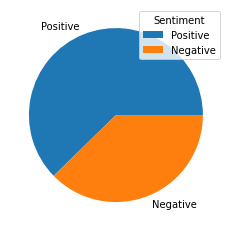

In [232]:
import numpy as np
import matplotlib.pyplot as plt 
pie = np.array([count, count1])
mylabels = ["Positive", "Negative"]

plt.pie(pie, labels = mylabels)
plt.legend(title = "Sentiment")
plt.show() 

In [235]:
review

,text,sentiment
0,the app is good,Positive
1,worst app,Negative
2,good,Positive
3,the app shows error,Positive
4,good,Positive
...,...,...
4007,very convinient,Positive
4008,i need ut love it,Negative
4009,you have to need add more functions like send ...,Positive
4010,excellent,Positive
